# Case 1 : Clustering for Pairs Tradings

In [ ]:
import pandas as pd
import numpy as np 
from pandas.plotting import  scatter_matrix
import seaborn as sns
import datetime

import matplotlib.pyplot as plt

from itertools import cycle

import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

import warnings
warnings.filterwarnings('ignore')

%load_ext autoreload
%autoreload 2

: 

In [3]:
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from scipy.spatial.distance import pdist

from sklearn.metrics import adjusted_mutual_info_score
from sklearn import cluster, covariance, manifold

from sklearn.preprocessing import StandardScaler

In [4]:
from data.get_data import *

In [27]:
Assets = ['BTC', 'ETH', 'SOL', 'EGLD', 'VET', 'GALA', 'QNT', 'TWT', 'BNB', 'KSM',
          'XMR', 'MATIC', 'DOT', 'SHIB', 'AAVE', 'FET', 'OCEAN', 'SC', 'CELR',
          'LINK', 'XRP', 'ADA', 'LTC', 'AVAX', 'ATOM', 'FIL', 'NEAR', 'ICP', 'ALGO',
          'FTM', 'THETA', 'CHZ', 'NEO', 'DASH', 'SNX', 'KAVA', 'DOGE', 'SAND',
          'CRV', 'ZIL', 'CELO', 'BAT', 'XLM', 'DODO', 'IOTA', 'APT', 'TROY', 'REN', 'IDEX',
          'YFI', 'EOS', 'LUNC', 'CFX', 'OP', 'LDO', 'PAXG', 'TRX', 'ILV', 'CAKE',
          'DEXE', 'ETC', 'LIT', 'APE', 'LTO', 'HOT', 'AXS', 'COMP', 'LUNA',
          'CFX', 'IMX', 'WOO', 'MINA', 'PEPE', 'ARB', 'MANA']

#Assets = ['BTC', 'ETH', 'SOL', 'EGLD', 'VET', 'GALA', 'QNT', 'TWT', 'BNB', 'KSM']

RISKY_ASSETS = Assets
START = "2022"
END = "2023"

data_r = get_data(interval="1h", assets = RISKY_ASSETS, start=START, end=END)
data_r.shape

,BTC,ETH,SOL,EGLD,VET,GALA,QNT,TWT,BNB,KSM,...,COMP,LUNA,CFX,CFX,IMX,WOO,MINA,PEPE,ARB,MANA
time,,,,,,,,,,,,,,,,,,,,,
2023-05-05 19:00:00,0.005527,0.005799,0.007933,0.007046,0.000000,0.007314,0.003506,0.004196,0.001222,0.002088,...,0.002945,0.003313,0.002786,0.002786,0.015748,0.002591,0.003200,0.091205,0.008218,0.003554
2023-05-05 20:00:00,-0.002319,-0.001647,-0.001312,-0.003998,-0.003303,-0.006971,-0.003493,-0.002985,-0.002441,0.004514,...,-0.000734,0.001073,-0.007099,-0.007099,0.004430,-0.003876,0.000000,0.050746,-0.002297,-0.002423
2023-05-05 21:00:00,-0.000215,-0.001243,-0.002627,0.001004,0.001420,0.007897,-0.001753,-0.000599,-0.001223,0.002074,...,-0.000490,-0.001567,0.001243,0.001243,0.006615,-0.002594,0.004785,-0.090909,0.001708,0.003176
2023-05-05 22:00:00,0.003491,0.001693,0.003073,0.002757,0.000946,0.002902,0.000878,0.003423,0.001531,0.005174,...,-0.001225,0.002560,0.000931,0.000931,0.000000,-0.001300,0.007937,0.040625,0.005412,0.003725
2023-05-05 23:00:00,-0.002843,0.002374,-0.001313,-0.003999,-0.000945,-0.002604,0.000877,-0.000171,-0.001834,-0.001030,...,-0.000491,-0.010792,-0.002171,-0.002171,0.001095,-0.001302,-0.001575,0.120120,0.000074,-0.000928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-02 13:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2023-07-02 14:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2023-07-02 15:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [28]:
h = 24
returns = pd.DataFrame((data_r + 1).prod() **(data_r.shape[0]/(365*h))) - 1
returns.columns = ["Returns"]
returns['Volatility'] = data_r.std() * np.sqrt(365*h)

data = returns 
data

,Returns,Volatility
BTC,0.005982,0.379233
ETH,-0.027033,0.327355
SOL,-0.027141,0.808506
EGLD,-0.021529,0.655434
VET,-0.006868,0.707609
...,...,...
WOO,-0.034589,0.987957
MINA,-0.040100,0.902917
PEPE,-0.104688,2.270770
ARB,-0.052964,0.744975


In [29]:
scaler = StandardScaler().fit(data)

r_data = pd.DataFrame(scaler.transform(data), columns=data.columns, index=data.index)
r_data

,Returns,Volatility
BTC,1.404169,-1.655549
ETH,0.300399,-1.854770
SOL,0.296805,-0.007094
EGLD,0.484424,-0.594910
VET,0.974568,-0.394550
...,...,...
WOO,0.047775,0.682014
MINA,-0.136445,0.355455
PEPE,-2.295789,5.608157
ARB,-0.566543,-0.251063


In [30]:
#px.scatter(r_data)
px.scatter(x=r_data.Returns, y=r_data.Volatility, hover_name=r_data.index)

## KMeans clustering

In [13]:
"""
distortions = []
max_loop = 20

for k in range(2, max_loop):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    distortions.append(kmeans.inertia_)
    
px.line(x=range(2, max_loop), y=distortions)
"""

'\ndistortions = []\nmax_loop = 20\n\nfor k in range(2, max_loop):\n    kmeans = KMeans(n_clusters=k)\n    kmeans.fit(X)\n    distortions.append(kmeans.inertia_)\n    \npx.line(x=range(2, max_loop), y=distortions)\n'

In [14]:
"""

from sklearn import metrics

silhouette_score = []

for k in range(2, max_loop):
    kmeans = KMeans(n_clusters=k, random_state=10, n_init=10, n_jobs=-1)
    kmeans.fit(X)
    silhouette_score.append(metrics.silhouette_score(X, kmeans.labels_, random_state=10))

px.line(x=range(2, max_loop), y = silhouette_score)

"""


'\n\nfrom sklearn import metrics\n\nsilhouette_score = []\n\nfor k in range(2, max_loop):\n    kmeans = KMeans(n_clusters=k, random_state=10, n_init=10, n_jobs=-1)\n    kmeans.fit(X)\n    silhouette_score.append(metrics.silhouette_score(X, kmeans.labels_, random_state=10))\n\npx.line(x=range(2, max_loop), y = silhouette_score)\n\n'

### visualisation

### Dendrogram

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [25.0, 25.0, 35.0, 35.0],
  [10.0, 10.0, 30.0, 30.0],
  [65.0, 65.0, 75.0, 75.0],
  [55.0, 55.0, 70.0, 70.0],
  [45.0, 45.0, 62.5, 62.5],
  [85.0, 85.0, 95.0, 95.0],
  [53.75, 53.75, 90.0, 90.0],
  [115.0, 115.0, 125.0, 125.0],
  [135.0, 135.0, 145.0, 145.0],
  [120.0, 120.0, 140.0, 140.0],
  [105.0, 105.0, 130.0, 130.0],
  [155.0, 155.0, 165.0, 165.0],
  [175.0, 175.0, 185.0, 185.0],
  [160.0, 160.0, 180.0, 180.0],
  [195.0, 195.0, 205.0, 205.0],
  [170.0, 170.0, 200.0, 200.0],
  [117.5, 117.5, 185.0, 185.0],
  [71.875, 71.875, 151.25, 151.25],
  [235.0, 235.0, 245.0, 245.0],
  [225.0, 225.0, 240.0, 240.0],
  [215.0, 215.0, 232.5, 232.5],
  [255.0, 255.0, 265.0, 265.0],
  [223.75, 223.75, 260.0, 260.0],
  [111.5625, 111.5625, 241.875, 241.875],
  [20.0, 20.0, 176.71875, 176.71875],
  [305.0, 305.0, 315.0, 315.0],
  [295.0, 295.0, 310.0, 310.0],
  [285.0, 285.0, 302.5, 302.5],
  [325.0, 325.0, 335.0, 335.0],
  [293.75, 293.75, 330.0, 330.0],
  [375

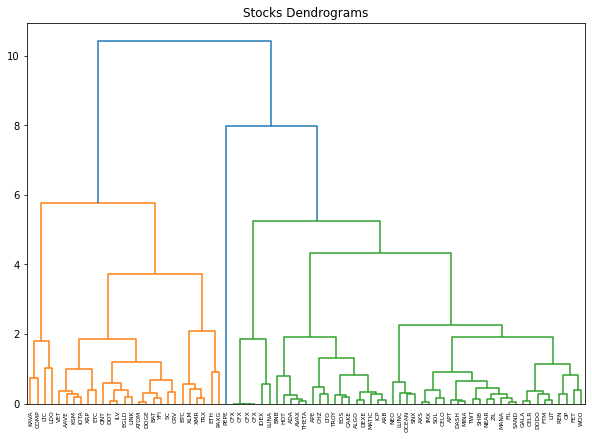

In [31]:
Z = linkage(r_data, method="ward")

plt.figure(figsize=(10, 7))
plt.title("Stocks Dendrograms")
dendrogram(Z, labels=r_data.index)

In [34]:
distance_threshold = 2
clusters = fcluster(Z, distance_threshold, criterion="distance")
chosen_clusters = pd.DataFrame(clusters, columns=['cluster'])
chosen_clusters['cluster'].unique()

array([3, 4, 8, 2, 6, 7, 1, 5, 9])

## AffinityPropagation

In [37]:
ap = AffinityPropagation()
ap.fit(r_data)
clusters = ap.predict(r_data)

px.scatter(x=r_data.Returns, y=r_data.Volatility, color=clusters)

In [39]:
ap.labels_

array([ 5,  4,  9,  0,  6,  1,  0,  2,  2,  0,  5,  3,  0,  2,  0,  1,  9,
        0,  1,  0,  6,  2,  6,  2,  0,  9,  9,  3,  3,  1,  2,  3,  9,  1,
        9,  7,  0,  9,  2,  2,  9,  0,  5,  1,  0,  1,  3,  1,  8,  0,  3,
        9,  8,  8,  1,  6,  4,  5,  0,  3,  3,  6,  1,  3,  3,  2,  9,  7,
        8,  8,  8,  9,  9,  9, 10,  2,  1], dtype=int64)

In [38]:
silhouette_score(r_data, ap.labels_, metric = 'euclidean')

TypeError: 'list' object is not callable

# Case 3 : Hierarchical Risk Parity

In [66]:
import cvxopt as opt
from cvxopt import blas, solvers
import scipy.cluster.hierarchy as sch
import numpy as np

In [106]:
X = data.copy('deep')

In [107]:
row = X.shape[0]
train_len = int(row * .8)

X_train = X.iloc[:train_len]
X_test = X.iloc[train_len:] 

## Building a hierarchy graph / dendrogram

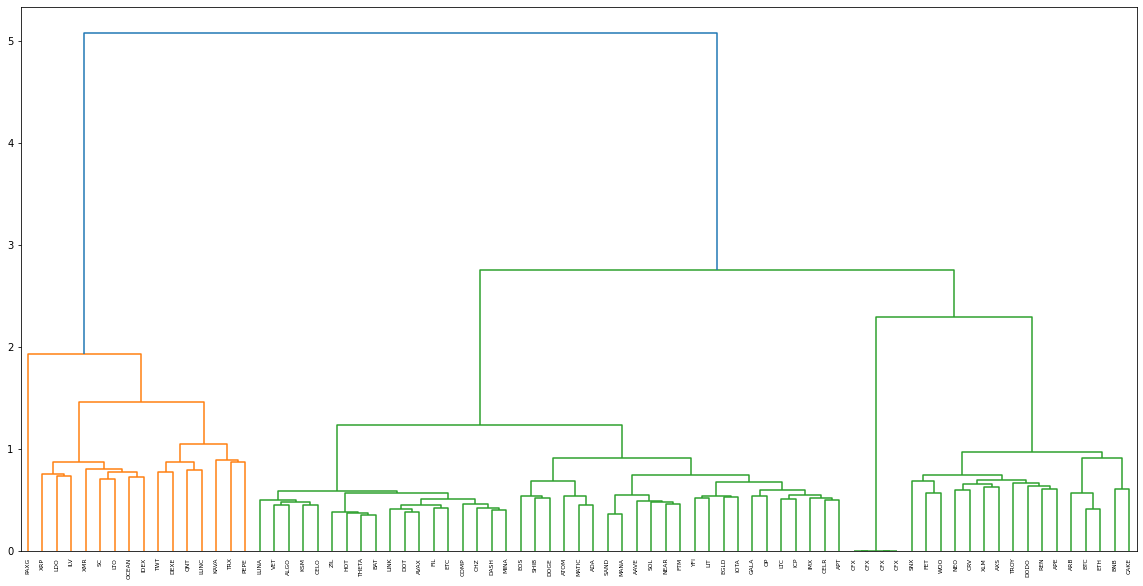

In [96]:
def correlDist(corr):
    dist = ((1 - corr) / 2) ** 0.5
    return dist

dist = correlDist(X_train.corr())
link = linkage(dist, 'ward')

plt.figure(figsize = (20, 10))
dendrogram(link, labels=X.columns)
plt.show()

## Quasi-diagonalization

In [64]:
def getQuasiDiag(link):
    # Sort clustered items by distance
    link = link.astype(int)
    sortIx = pd.Series([link[-1, 0], link[-1, 1]])
    numItems = link[-1, 3]          # number of original items
    while sortIx.max() >= numItems:
        sortIx.index = range(0, sortIx.shape[0]*2, 2)   # make space
        df0 = sortIx[sortIx >= numItems]    # find clusters
        i = df0.index
        j = df0.values - numItems
        sortIx[i] = link[j, 0]      # item 1
        df0 = pd.Series(link[j, 1], index=i+1)
        sortIx = sortIx.append(df0)     # item 2
        sortIx = sortIx.sort_index()    # re-sort 
        sortIx.index = range(sortIx.shape[0])   # re-index
    return sortIx.tolist()


## Recusrisve bisection

In [68]:
def getIVP(cov, **kargs):
    ivp = 1 / np.diag(cov)
    ivp /= ivp.sum()
    return ivp


def getClusterVar(cov, cItems):
    cov_ = cov.loc[cItems, cItems]      # matrix slice
    w_ = getIVP(cov_).reshape(-1, 1)
    cVar = np.dot(np.dot(w_.T, cov_), w_)[0, 0]
    return cVar


def getRecBipart(cov, sortIx):
    w = pd.Series(1, index=sortIx)
    cItems = [sortIx]
    while len(cItems) > 0:
        cItems = [i[j:k] for i in cItems for j, k in ((0, len(i)//2), (len(i)//2, len(i))) if len(i) > 1]     # bi-section
        for i in range(0, len(cItems), 2):
            cItems0 = cItems[i]        # cluster 1
            cItems1 = cItems[i + 1]     # cluster 2
            cVar0 = getClusterVar(cov, cItems0)
            cVar1 = getClusterVar(cov, cItems1)
            alpha = 1 - cVar0 / (cVar0 + cVar1)
            w[cItems0] *= alpha
            w[cItems1] *= 1 - alpha
    return w


def getHRP(cov, corr):
    dist = correlDist(corr)
    link = sch.linkage(dist, 'single')
    
    sortIx = getQuasiDiag(link)
    sortIx = corr.index[sortIx].tolist()
    
    hrp = getRecBipart(cov, sortIx)
    
    return hrp.sort_index()

## Comparison against other asset allocation methods

In [70]:
def getMVP(cov):
    cov = cov.T.values
    n = len(cov)
    N = 100
    mus = [10**(5*t/N - 1) for t in range(N)]
    
    # Convert to cvxopt matrices
    S = opt.matrix(cov)
    
    # pbar = opt.matrix(np.mean(returns, axis=1))
    pbar = opt.matrix(np.ones(cov.shape[0]))
    
    # Create constraint matrices
    G = -opt.matrix(np.eye(n))
    h = opt.matrix(0.0, (n, 1))
    A = opt.matrix(1.0, (1, n))
    b = opt.matrix(1.0)
    
    # Calculate efficient frontier weights using quadratique programming
    solvers.options['show_progress'] = False
    portfolios = [solvers.qp(mu * S, -pbar, G, h, A, b)['x'] for mu in mus]
    
    # Calculate risk and return of the frontier
    returns = [blas.dot(pbar, x) for x in portfolios]
    risks = [np.sqrt(blas.dot(x, S*x)) for x in portfolios]
    
    # Calculate the 2nd degree polynomiale of the frontier curve
    m1 = np.polyfit(returns, risks, 2)
    x1 = np.sqrt(m1[2] / m1[0])
    
    # Calculate the optimal portfolio
    wt = solvers.qp(opt.matrix(x1*S), -pbar, G, h, A, b)['x']
    
    return list(wt)


## Getting the portfolio wieghts for all types of asset allocation

Text(0.5, 1.0, 'HRP')

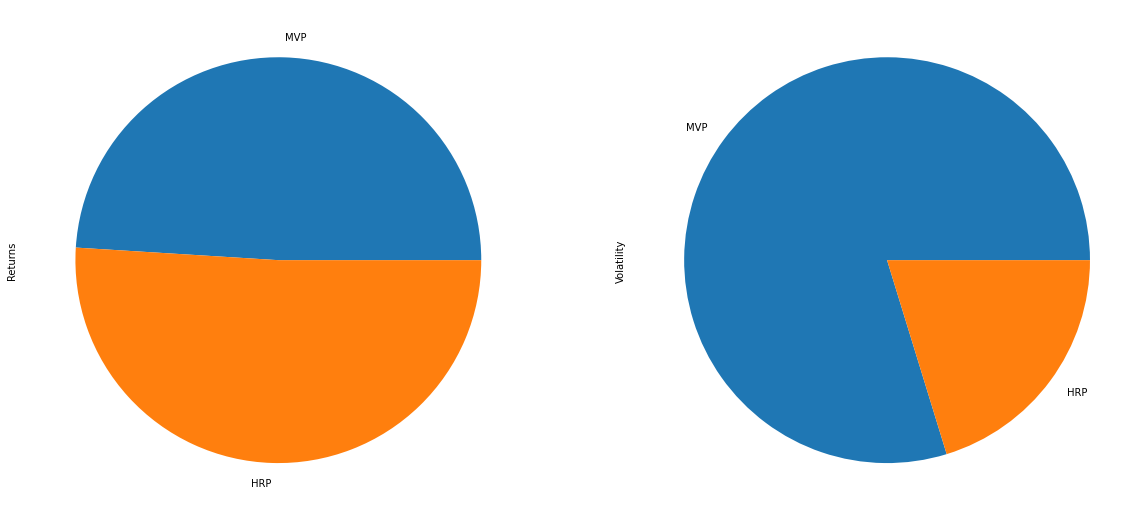

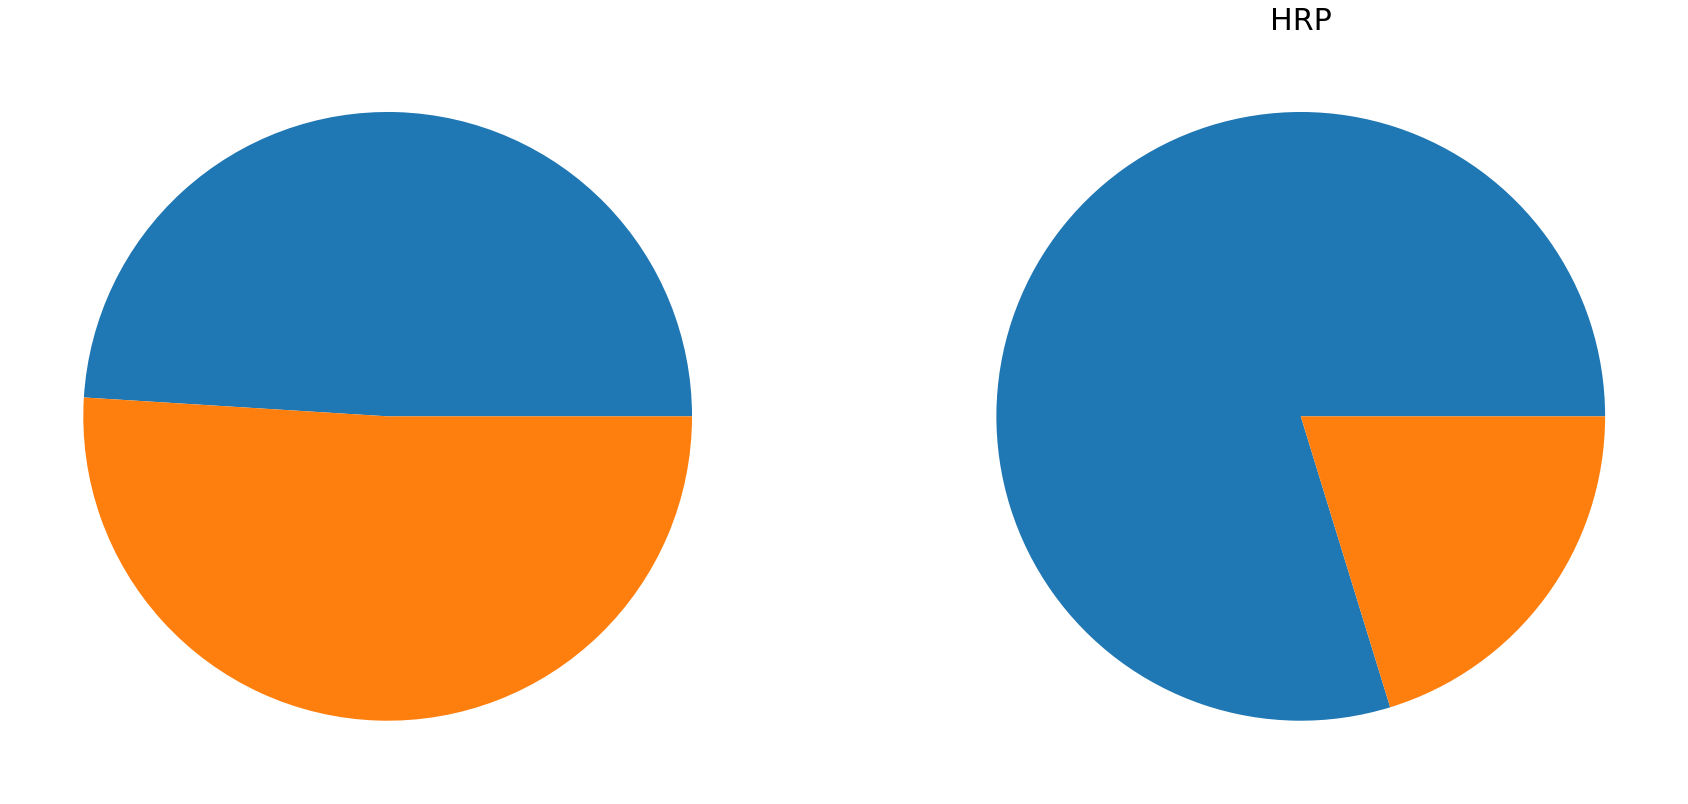

In [71]:
def get_all_portfolio(returns):
    cov, corr = returns.cov(), returns.corr()
    hrp = getHRP(cov, corr)
    mvp = getMVP(cov)
    mvp = pd.Series(mvp, index=cov.index)
    portfolios = pd.DataFrame([mvp, hrp], index=['MVP', 'HRP'])
    return portfolios


# Now getting the portfolios and plotting the pie chart
portfolios = get_all_portfolio(returns)

portfolios.plot.pie(subplots = True, figsize = (20, 10), legend=False)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(30, 20))
ax1.pie(portfolios.iloc[:, 0], );
ax2.set_title('MVP', fontsize = 30)
ax2.pie(portfolios.iloc[:, 1]);
ax2.set_title('HRP', fontsize=30)

<AxesSubplot: title={'center': 'Out Of Sample Results'}>

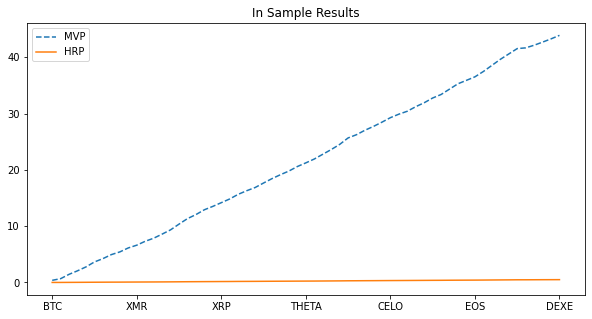

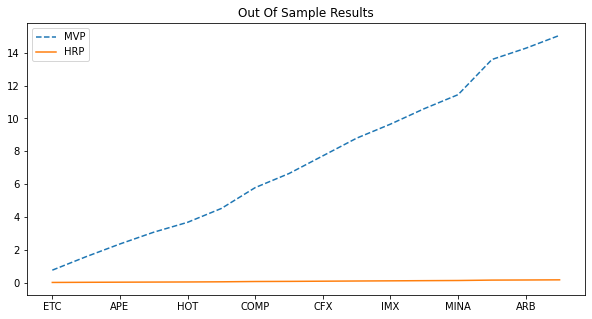

In [109]:
Insample_Result = pd.DataFrame(np.dot(X_train, np.array(portfolios)),
                               columns = ['MVP', 'HRP'], index=X_train.index)

OutOfSample_Result = pd.DataFrame(np.dot(X_test, np.array(portfolios)),
                                  columns = ['MVP', 'HRP'], index = X_test.index)


Insample_Result.cumsum().plot(figsize = (10, 5),
                              title="In Sample Results",
                              style=["--", "-"]
                              )
OutOfSample_Result.cumsum().plot(figsize = (10, 5),
                                 title="Out Of Sample Results",
                                 style=["--", "-"]
                                 )